# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the dataset

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [6]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [7]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [8]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

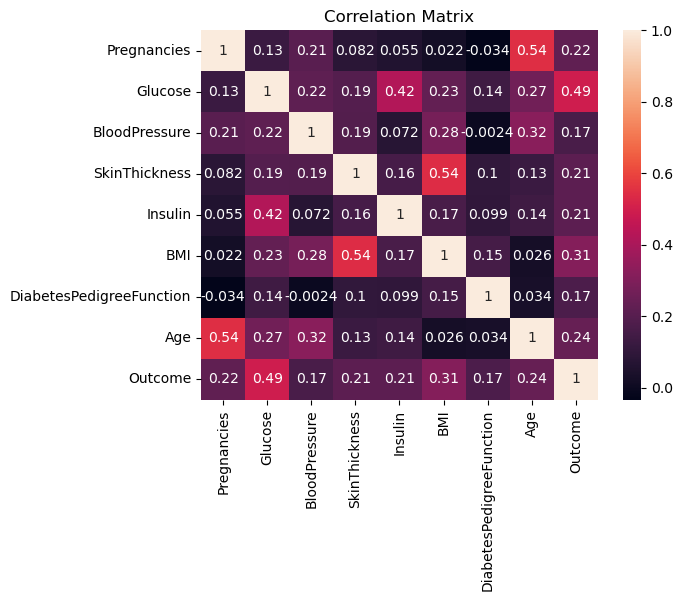

In [9]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

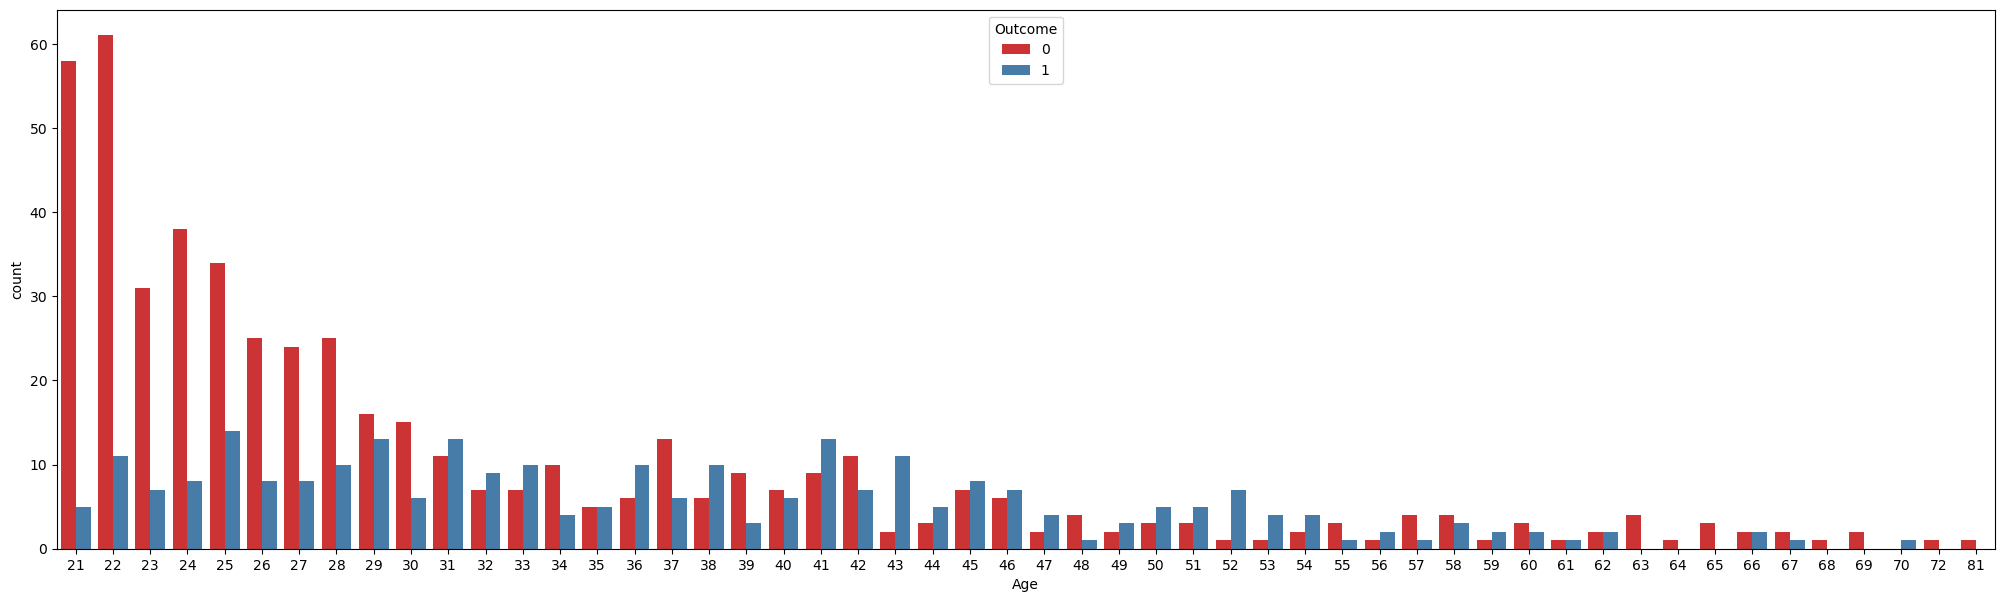

In [10]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=data,palette='Set1')

# splitting dataset into training and testing set (0.2)

In [11]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2,random_state=0)

 ### feature scaling

In [12]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

### loading model - KNN

In [13]:
classifier1 = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

### fitting model

In [14]:
classifier1.fit(X1_train,y1_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### making predictions

In [15]:
y1_pred = classifier1.predict(X1_test)

/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### evaluating model

[[94 13]
 [15 32]]
0.6956521739130436


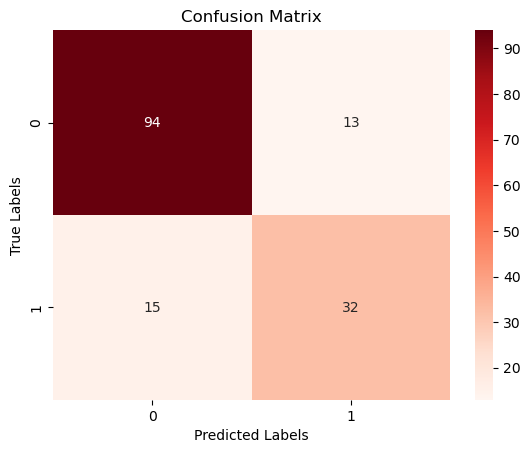

In [16]:
conf_matrix1 = confusion_matrix(y1_test,y1_pred)
print(conf_matrix1)
print(f1_score(y1_test,y1_pred))
sns.heatmap(conf_matrix1, annot=True, cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### evaluation


In [17]:
TN, FP, FN, TP = conf_matrix1.ravel()

# calculate Sensitivity (True Positive Rate)
Sensitivity1 = TP / (TP + FN)

# calculate Specificity (True Negative Rate)
Specificity1 = TN / (TN + FP)

# calculate accuracy
accuracy1 = accuracy_score(y1_test,y1_pred)

# calculate Precision (Positive Predictive Value)
Precision1 = TP / (TP + FP)

# calculate False Positive Rate
FPR1 = FP / (FP + TN)

# calculate False Negative Rate
FNR1 = FN / (FN + TP)

# calculate Negative Predictive Value
NPV1 = TN / (TN + FN)

# calculate False Discovery Rate
FDR1 = FP / (FP + TP)

# calculate F1-Score
F1_Score1 = 2 * ((Precision1 * Sensitivity1) / (Precision1 + Sensitivity1))

# calculate Matthews Correlation Coefficient (MCC)
MCC1 = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5

# print the metrics
print("Specificity: ", Specificity1)
print("Sensitivity: ", Sensitivity1)
print("Accuracy:    ", accuracy1)
print("Precision:   ", Precision1)
print("FPR:         ", FPR1)
print("FNR:         ", FNR1)
print("NPV:         ", NPV1)
print("FDR:         ", FDR1)
print("F1-Score:    ", F1_Score1)
print("MCC:         ", MCC1)

Specificity:  0.8785046728971962
Sensitivity:  0.6808510638297872
Accuracy:     0.8181818181818182
Precision:    0.7111111111111111
FPR:          0.12149532710280374
FNR:          0.3191489361702128
NPV:          0.8623853211009175
FDR:          0.28888888888888886
F1-Score:     0.6956521739130436
MCC:          0.5663819553536781


## ROC

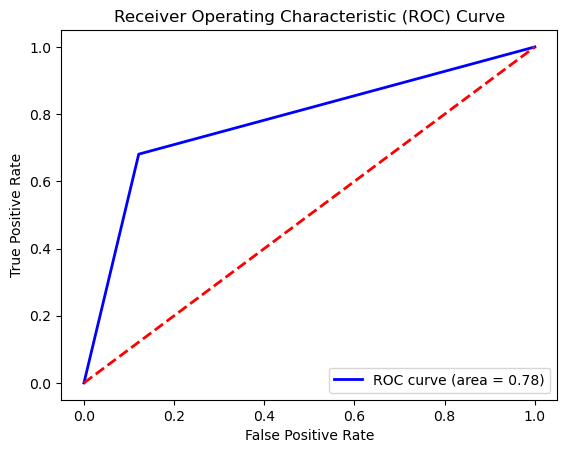

In [18]:
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# splitting dataset into training and testing set (0.3)

In [19]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size=0.3,random_state=0)

## feature scaling

In [20]:
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

## loading model - KNN

In [21]:
classifier2 = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

## fitting model

In [22]:
classifier2.fit(X2_train,y2_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## making predictions

In [23]:
y2_pred = classifier2.predict(X2_test)

/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## evaluating model

[[135  22]
 [ 33  41]]
0.5985401459854015


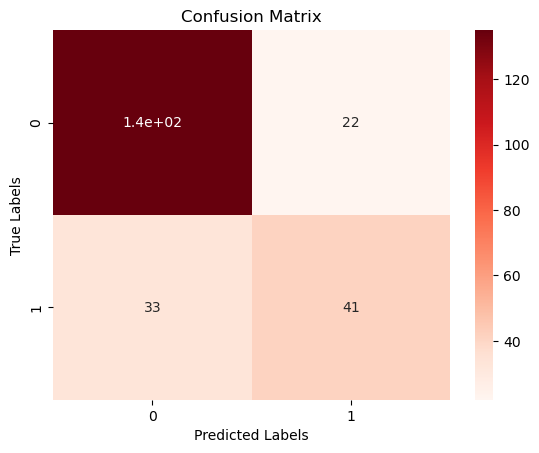

In [24]:
conf_matrix2 = confusion_matrix(y2_test,y2_pred)
print(conf_matrix2)
print(f1_score(y2_test,y2_pred))
sns.heatmap(conf_matrix2, annot=True, cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## evaluation

In [25]:
TN, FP, FN, TP = conf_matrix2.ravel()

# calculate Sensitivity (True Positive Rate)
Sensitivity2 = TP / (TP + FN)

# calculate Specificity (True Negative Rate)
Specificity2 = TN / (TN + FP)

# calculate accuracy
accuracy2 = accuracy_score(y2_test,y2_pred)

# calculate Precision (Positive Predictive Value)
Precision2 = TP / (TP + FP)

# calculate False Positive Rate
FPR2 = FP / (FP + TN)

# calculate False Negative Rate
FNR2 = FN / (FN + TP)

# calculate Negative Predictive Value
NPV2 = TN / (TN + FN)

# calculate False Discovery Rate
FDR2 = FP / (FP + TP)

# calculate F1-Score
F1_Score2 = 2 * ((Precision2 * Sensitivity2) / (Precision2 + Sensitivity2))

# calculate Matthews Correlation Coefficient (MCC)
MCC2 = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5

# print the metrics
print("Specificity: ", Specificity2)
print("Sensitivity: ", Sensitivity2)
print("Accuracy:    ", accuracy2)
print("Precision:   ", Precision2)
print("FPR:         ", FPR2)
print("FNR:         ", FNR2)
print("NPV:         ", NPV2)
print("FDR:         ", FDR2)
print("F1-Score:    ", F1_Score2)
print("MCC:         ", MCC2)

Specificity:  0.8598726114649682
Sensitivity:  0.5540540540540541
Accuracy:     0.7619047619047619
Precision:    0.6507936507936508
FPR:          0.14012738853503184
FNR:          0.44594594594594594
NPV:          0.8035714285714286
FDR:          0.3492063492063492
F1-Score:     0.5985401459854015
MCC:          0.43367478855690145


## ROC

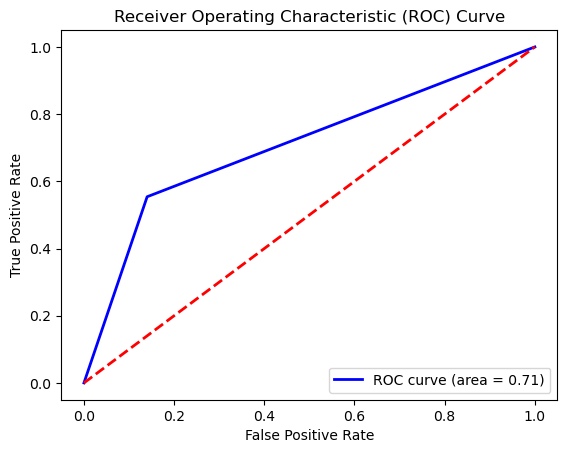

In [26]:
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# splitting dataset into training and testing set (0.4)

In [27]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X,y,test_size=0.4,random_state=0)

## feature scaling

In [28]:
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

## loading model - KNN

In [29]:
classifier3 = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

## fitting model

In [30]:
classifier3.fit(X3_train,y3_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

## making predictions

In [31]:
y3_pred = classifier3.predict(X3_test)

/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## evaluating model

[[177  28]
 [ 51  52]]
0.5683060109289617


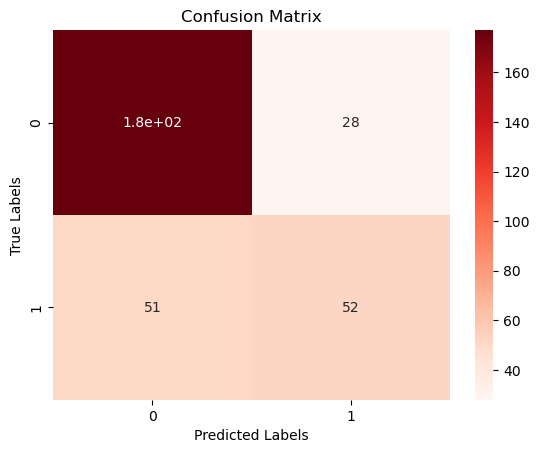

In [32]:
conf_matrix3 = confusion_matrix(y3_test,y3_pred)
print(conf_matrix3)
print(f1_score(y3_test,y3_pred))
sns.heatmap(conf_matrix3, annot=True, cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## evaluation

In [33]:
TN, FP, FN, TP = conf_matrix3.ravel()

# calculate Sensitivity (True Positive Rate)
Sensitivity3 = TP / (TP + FN)

# calculate Specificity (True Negative Rate)
Specificity3 = TN / (TN + FP)

# calculate accuracy
accuracy3 = accuracy_score(y3_test,y3_pred)

# calculate Precision (Positive Predictive Value)
Precision3 = TP / (TP + FP)

# calculate False Positive Rate
FPR3 = FP / (FP + TN)

# calculate False Negative Rate
FNR3 = FN / (FN + TP)

# calculate Negative Predictive Value
NPV3 = TN / (TN + FN)

# calculate False Discovery Rate
FDR3 = FP / (FP + TP)

# calculate F1-Score
F1_Score3 = 2 * ((Precision3 * Sensitivity3) / (Precision3 + Sensitivity3))

# calculate Matthews Correlation Coefficient (MCC)
MCC3 = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5

# print the metrics
print("Specificity: ", Specificity3)
print("Sensitivity: ", Sensitivity3)
print("Accuracy:    ", accuracy3)
print("Precision:   ", Precision3)
print("FPR:         ", FPR3)
print("FNR:         ", FNR3)
print("NPV:         ", NPV3)
print("FDR:         ", FDR3)
print("F1-Score:    ", F1_Score3)
print("MCC:         ", MCC3)

Specificity:  0.8634146341463415
Sensitivity:  0.5048543689320388
Accuracy:     0.7435064935064936
Precision:    0.65
FPR:          0.13658536585365855
FNR:          0.49514563106796117
NPV:          0.7763157894736842
FDR:          0.35
F1-Score:     0.5683060109289617
MCC:          0.39623085541896697


## ROC

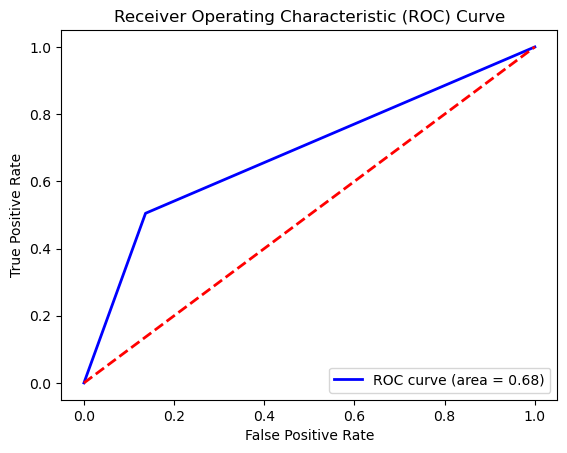

In [34]:
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

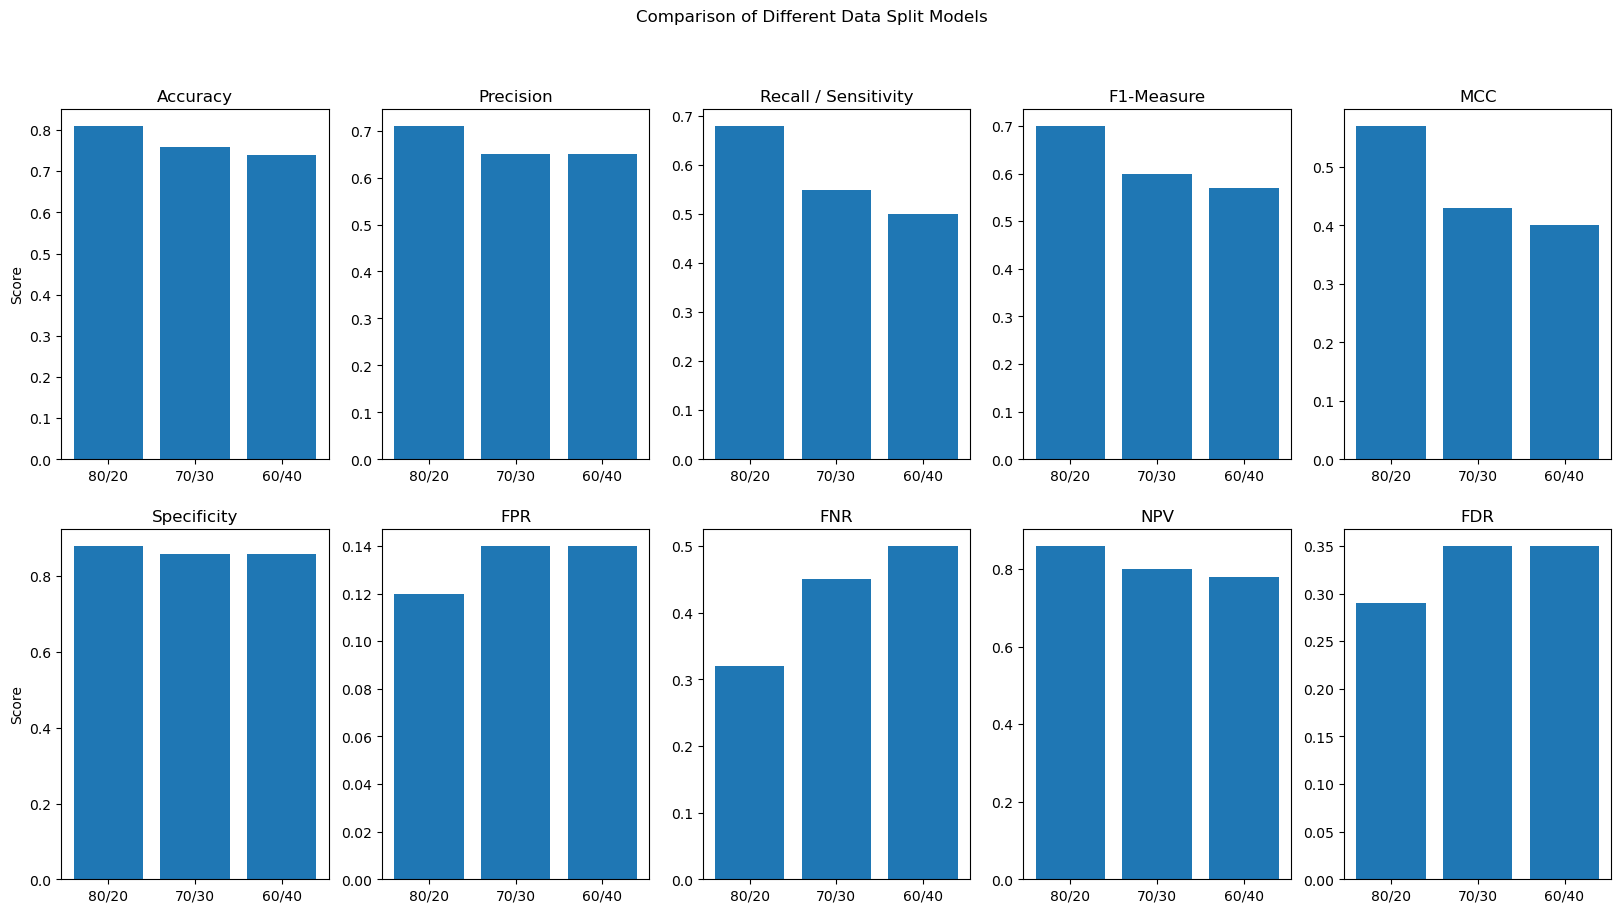

In [35]:
# Data for plotting
labels = ['80/20', '70/30', '60/40']
 
accuracy = [0.81, 0.76, 0.74]
precision = [0.71, 0.65, 0.65]
recall = [0.68, 0.55, 0.50]
f1_measure = [0.70, 0.60, 0.57]
sensitivity = [0.68, 0.55, 0.50]
specificity = [0.88, 0.86, 0.86]
fpr = [0.12, 0.14, 0.14]
fnr = [0.32, 0.45, 0.50]
npv = [0.86, 0.80, 0.78]
fdr = [0.29, 0.35, 0.35]
mcc = [0.57, 0.43, 0.40]
 
# Create subplots for each metric
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
 
# Plot data for each metric
axs[0, 0].bar(labels, accuracy)
axs[0, 0].set_title('Accuracy')
 
axs[0, 1].bar(labels, precision)
axs[0, 1].set_title('Precision')
 
axs[0, 2].bar(labels, recall)
axs[0, 2].set_title('Recall / Sensitivity')
 
axs[0, 3].bar(labels, f1_measure)
axs[0, 3].set_title('F1-Measure')
 
axs[0, 4].bar(labels, mcc)
axs[0, 4].set_title('MCC')
 
axs[1, 0].bar(labels, specificity)
axs[1, 0].set_title('Specificity')
 
axs[1, 1].bar(labels, fpr)
axs[1, 1].set_title('FPR')
 
axs[1, 2].bar(labels, fnr)
axs[1, 2].set_title('FNR')
 
axs[1, 3].bar(labels, npv)
axs[1, 3].set_title('NPV')
 
axs[1, 4].bar(labels, fdr)
axs[1, 4].set_title('FDR')
 
# Set common y-axis labels for each row
axs[0, 0].set_ylabel('Score')
axs[1, 0].set_ylabel('Score')
 
# Set title for the entire figure
fig.suptitle('Comparison of Different Data Split Models')
 
# Show the plot
plt.show()